In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import resample

In [2]:
df_users= pd.read_csv('/Users/josephlim/Downloads/relax_challenge/takehome_users.csv',encoding='latin-1')
df_engagements= pd.read_csv('/Users/josephlim/Downloads/relax_challenge/takehome_user_engagement.csv')

In [3]:
df_users.shape

(12000, 10)

In [4]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
df_users['last_session_creation_time']= pd.to_datetime(df_users['last_session_creation_time'], unit='s')
df_users['creation_time']= pd.to_datetime(df_users['creation_time'])

In [7]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [9]:
df_users.rename(columns={'object_id':'user_id'}, inplace=True)

In [10]:
null_sesh= df_users[df_users['last_session_creation_time'].isna()]
null_sesh

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN
11,12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaT,0,0,130,9270.0
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,175,NaN
15,16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,211,NaN
...,...,...,...,...,...,...,...,...,...,...
11975,11976,2013-12-25 22:01:41,Kohl Leah,LeahKohl@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,248,NaN
11977,11978,2014-04-23 16:28:06,Castro Pedro,PedroCunhaCastro@gustr.com,PERSONAL_PROJECTS,NaT,1,0,29,NaN
11984,11985,2013-07-08 17:23:26,Jespersen Marcus,MarcusTJespersen@cuvox.de,PERSONAL_PROJECTS,NaT,0,0,74,NaN
11992,11993,2013-03-28 23:24:21,Townsend Isabel,IsabelTownsend@cuvox.de,PERSONAL_PROJECTS,NaT,0,0,281,NaN


We'll assume those without 'last_session_creation_time' are not adopted users. Let's fill them with 0.

In [11]:
df_users['last_session_creation_time'].fillna(0, inplace=True)

In [12]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 937.6+ KB


In [13]:
df_engagements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [14]:
df_engagements.shape

(207917, 3)

In [15]:
df_engagements.columns

Index(['time_stamp', 'user_id', 'visited'], dtype='object')

In [16]:
df_engagements['time_stamp']= pd.to_datetime(df_engagements['time_stamp'])

In [17]:
df= df_engagements.copy()

In [18]:
df['date']= pd.to_datetime(df.time_stamp.dt.date)

In [19]:
df.head()

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [20]:
def roll(df_group, freq):
    return df_group.rolling(freq, on= 'date')['user_id'].count()

In [21]:
df['visits_7_days']= df.groupby('user_id', as_index='False', group_keys=False).apply(roll,'7D')

In [22]:
df.describe()

,user_id,visited,visits_7_days
count,207917.000000,207917.0,207917.000000
mean,5913.314197,1.0,4.381393
std,3394.941674,0.0,2.042666
min,1.000000,1.0,1.000000
25%,3087.000000,1.0,3.000000
50%,5682.000000,1.0,4.000000
75%,8944.000000,1.0,6.000000
max,12000.000000,1.0,7.000000


In [23]:
df_adoption= df.groupby('user_id')['visits_7_days'].max().reset_index()

In [24]:
df_adoption['user_adoption']= df_adoption['visits_7_days'].apply(lambda x:1 if x>=3 else 0)

In [25]:
df_adoption.head(3)

,user_id,visits_7_days,user_adoption
0,1,1.0,0
1,2,3.0,1
2,3,1.0,0


In [26]:
df_adoption.user_adoption.value_counts()

0    7221
1    1602
Name: user_adoption, dtype: int64

In [27]:
df_adoption.set_index('user_id', inplace=True)

In [28]:
df_adoption.drop('visits_7_days', axis=1, inplace=True)

In [29]:
df= df_users.join(df_adoption, on= 'user_id', how= 'left')

In [30]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_adoption
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  user_adoption               8823 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)


In [32]:
df['creation_time']=pd.to_numeric(df['creation_time'])

It is safe to assume those without 'invited_by_user_id' values were not invited. Let's impute 0.

In [33]:
df['invited_by_user_id'].fillna(0, inplace=True)

It is safe to assume those without user_adoption data that there was no user adoption data.

In [34]:
df['user_adoption'].fillna(0, inplace=True)

In [35]:
df.user_adoption.value_counts()

0.0    10398
1.0     1602
Name: user_adoption, dtype: int64

In [36]:
df_NA= df[df['user_adoption']==0]
df_A= df[df['user_adoption']==1]

In [37]:
df_A_resamp= resample(df_A, replace=True, n_samples=10398, random_state=42)

In [38]:
resamp_list= [df_NA, df_A_resamp]
df_R= pd.concat(resamp_list)

In [39]:
df_R['user_adoption'].value_counts()

0.0    10398
1.0    10398
Name: user_adoption, dtype: int64

In [40]:
df_N= df_R.select_dtypes(include='number')

In [41]:
X= df_N.drop('user_adoption', axis=1)
y= df_N['user_adoption']

In [42]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, test_size=0.3)

In [43]:
# make random grid
random_grid = {
                 'n_estimators': [10, 25, 50, 75, 100],
                 'criterion': ["gini", "entropy"],
                 'max_depth': [3, 6, 10, 12],
                 'max_features': ['auto', 'sqrt']
                }

In [44]:
RF= RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=RF, param_distributions=random_grid, n_iter=100, cv=3, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

/Users/josephlim/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 6, 10, 12],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 25, 50, 75, 100]},
                   random_state=42)

In [45]:
rf_random.best_params_

{'n_estimators': 100,
 'max_features': 'sqrt',
 'max_depth': 12,
 'criterion': 'gini'}

In [46]:
n_estimators= rf_random.best_params_['n_estimators']
max_features= rf_random.best_params_['max_features']
max_depth= rf_random.best_params_['max_depth']
criterion= rf_random.best_params_['criterion']

model= RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, criterion=criterion)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.63      0.95      0.76      2082
         1.0       0.97      0.73      0.83      4157

    accuracy                           0.80      6239
   macro avg       0.80      0.84      0.79      6239
weighted avg       0.85      0.80      0.81      6239



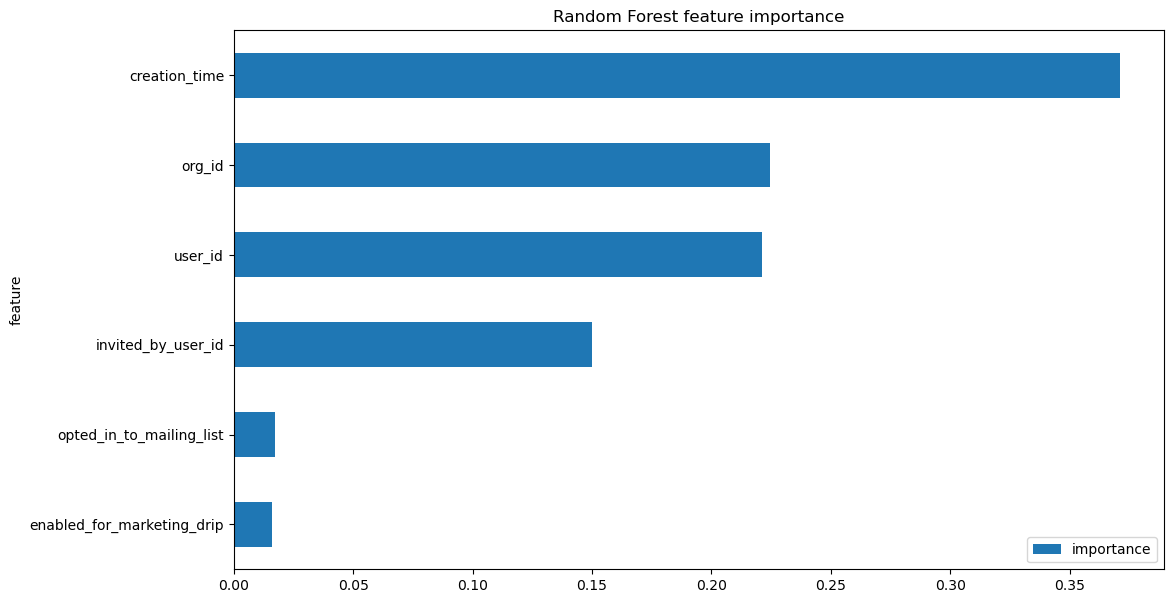

In [47]:
feat_imp = pd.DataFrame({'importance':model.feature_importances_})    
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
_ = feat_imp.plot.barh(title = 'Random Forest feature importance', figsize = (12,7))

It seems the most important factor is creation time. 